In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Read CSV file

In [83]:
df = pd.read_csv('AmesHousing.csv')
df.drop(['PID', 'Order'], axis=1, inplace=True)

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

- Mô tả của dữ liệu dược nói rõ hơn ở trong file [data_description.txt](./data_description.txt)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

1. Đặc điểm lô đất:
    - `MS SubClass`: Loại nhà (one-story, two-story, etc.)
    - `MS Zoning`: Phân vùng khu vực (Residential, Commercial, etc.)
    - `Lot Frontage`: Chiều dài mặt tiền
    - `Lot Area`: Diện tích lô đất
    - `Street`: Đường tiếp giáp (Paved, Gravel, etc.)
    - `Alley`: Lối đi phía sau nhà (Paved, Gravel, etc.)
    - `Lot Shape`: Hình dạng lô đất (Regular, Irregular, etc.)
    - `Land Contour`: Địa hình (Flat, Hilly, etc.)
    - `Utilities`: Tiện ích có sẵn (All public utilities, No sewer, etc.)
    - `Lot Config`: Cấu hình lô đất (Inside, Corner, etc.)
    - `Land Slope`: Độ dốc đất (Flat, Slight Slope, etc.)
    - `Neighborhood`: Vùng lân cận

2. Đặc điểm nhà:
    - `Condition 1`: Tình trạng nhà (Excellent, Good, etc.)
    - `Condition 2`: Tình trạng nhà phụ thuộc
    - `Bldg Type`: Kiểu nhà (Detached, Two-family attached, etc.)
    - `House Style`: Kiểu dáng nhà (Cape Cod, Colonial, etc.)
    - `Overall Qual`: Chất lượng xây dựng tổng thể
    - `Overall Cond`: Tình trạng nhà tổng thể
    - `Year Built`: Năm xây dựng
    - `Year Remod`/Add: Năm cải tạo/cơi nới
    - `Roof Style`: Kiểu mái (Gable, Hip, etc.)
    - `Roof Matl`: Vật liệu mái (Metal, Slate, etc.)
    - `Exterior 1st`: Vật liệu ngoại thất chính
    - `Exterior 2nd`: Vật liệu ngoại thất phụ
    - `Mas Vnr` Type: Kiểu ốp mặt tiền
    - `Mas Vnr` Area: Diện tích ốp mặt tiền
    - `Exter Qual`: Chất lượng ngoại thất
    - `Exter Cond`: Tình trạng ngoại thất
    - `Foundation:` Kiểu móng nhà
    - `Bsmt Qual`: Chất lượng tầng hầm
    - `Bsmt Cond`: Tình trạng tầng hầm
    - `Bsmt Exposure`: Mức độ tiếp xúc của tầng hầm với mặt đất
    - `BsmtFin Type 1`: Kiểu hoàn thiện tầng hầm 1
    - `BsmtFin SF 1`: Diện tích hoàn thiện tầng hầm 1
    - `BsmtFin Type 2`: Kiểu hoàn thiện tầng hầm 2
    - `BsmtFin SF 2`: Diện tích hoàn thiện tầng hầm 2
    - `Bsmt Unf SF`: Diện tích chưa hoàn thiện của tầng hầm
    - `Total Bsmt SF`: Tổng diện tích tầng hầm


3. Đặc điểm hệ thống:
    - `Heating`: Hệ thống sưởi ấm
    - `Heating QC`: Chất lượng hệ thống sưởi ấm
    - `Central Air`: Điều hòa không khí
    - `Electrical`: Hệ thống điện


4. Diện tích:
    - `1st Flr SF`: Diện tích tầng 1
    - `2nd Flr SF`: Diện tích tầng 2
    - `Low Qual Fin SF`: Diện tích hoàn thiện chất lượng thấp
    - `Gr Liv Area`: Diện tích sàn sinh hoạt


5. Phòng tắm và phòng ngủ:
    - `Bsmt Full Bath`: Số phòng tắm đầy đủ tầng hầm
    - `Bsmt Half Bath`: Số phòng tắm nửa tầng hầm
    - `Full Bath`: Số phòng tắm đầy đủ
    - `Half Bath`: Số phòng tắm nửa
    - `Bedroom AbvGr`: Số phòng ngủ trên tầng
    - `Kitchen AbvGr`: Số bếp trên tầng


6. Đặc điểm khác:
    - `Kitchen Qual`: Chất lượng nhà bếp
    - `TotRms AbvGrd`: Tổng số phòng trên tầng
    - `Functional`: Chức năng tổng thể của nhà
    - `Fireplaces`: Số lò sưởi
    - `Fireplace Qu`: Chất lượng lò sưởi
    - `Garage Type`: Kiểu gara
    - `Garage Yr Blt`: Năm xây dựng gara
    - `Garage Finish`: Hoàn thiện gara
    - `Garage Cars`: Số chỗ đỗ xe trong gara
    - `Garage Area`: Diện tích gara
    - `Garage Qual`: Chất lượng gara
    - `Garage Cond`: Tình trạng gara
    - `Paved Drive`: Đường lái xe được lát đá
    - `Wood Deck SF`: Diện tích sàn gỗ
    - `Open Porch SF`: Diện tích hiên mở
    - `Enclosed Porch`: Diện tích hiên kín
    - `3Ssn Porch`: Diện tích hiên nhà ba mùa tính bằng mét vuông

- Danh sách các features có kiểu dữ liệu là numerical và categorical

In [84]:
numerical_features = df.select_dtypes(exclude=['object'])
print(f"Chúng ta có {numerical_features.shape[1]} columns numerical: \n", numerical_features.columns)

Chúng ta có 37 columns numerical: 
 Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')


In [85]:
categorical_features = df.select_dtypes(include=['object'])
print(f"Chúng ta có {categorical_features.shape[1]} columns numerical: \n", categorical_features.columns)

Chúng ta có 43 columns numerical: 
 Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


# Phân tích dữ liệu

## Missing values

In [86]:
missing_data_count = df.isnull().sum()

missing_data = pd.DataFrame({
    'Count': missing_data_count,
})
missing_data = missing_data[missing_data.Count > 0]
print("Missing data columns:", missing_data.index)
missing_data.sort_values(by='Count', ascending=False, inplace=True)


print(f"There are {missing_data.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data.head(10)

Missing data columns: Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')
There are 27 features having missing data.

Top 10 missing value features:


,Count
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Lot Frontage,490
Garage Cond,159
Garage Qual,159
Garage Finish,159


- Dựa vào file [data_description.txt](./data_description.txt):

    - Ta có thể chia các dữ liệu ra như sau:

        1. Bao gồm các categorical features khi NA có nghĩa là không có tính năng đó trong nhà: `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu`, `Garage Type`, `Garage Finish`, `Garage Qual`, `Garage Cond`, `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Mas Vnr Type` (15 features)
        Với group này ta sẽ fillna với giá trị: 'None'.

        2. Bao gồm các numerical features khi NA có nghĩa là không có tính năng đó trong nhà: `Garage Area`, `Garage Cars`, `BsmtFin SF 1`, `BsmtFin SF 2`, `Bsmt Unf SF`, `Total Bsmt SF`, `Bsmt Full Bath`, `Bsmt Half Bath`, `Mas Vnr Area` (10 features)
        Với group này ta sẽ fillna với giá trị: 0.

        3. `Electrical`: fill với giá trị xuất hiện nhiều nhất.

        4. `Lot Frontage`: fill với giá trị trung bình của feature

        5. `Garage Yr Blt`: fill với giá trị bằng với giá trị của YearBuilt



In [87]:
# Fill categorical features with 'None'
missing_categorical_features = ['Pool QC', 'Misc Feature', 'Alley', 'Fence',
                        'Fireplace Qu', 'Garage Type', 'Garage Finish', 
                        'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond', 
                        'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 
                        'Mas Vnr Type']

df[missing_categorical_features] = df[missing_categorical_features].fillna('None')

# Fill numerical features with 0
missing_numerical_features = ['Garage Area', 'Garage Cars', 'BsmtFin SF 1',
                      'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
                      'Bsmt Full Bath', 'Bsmt Half Bath', 'Mas Vnr Area']
df[missing_numerical_features] = df[missing_numerical_features].fillna(0)

# Fill 'Electrical' with the most frequent value
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# Fill 'Lot Frontage' with the mean value
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())

# Fill 'Garage Yr Blt' with the value of 'YearBuilt'
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])


In [88]:
# Update numerical features and categorical features
numerical_features = df.select_dtypes(exclude=['object'])
categorical_features = df.select_dtypes(include=['object'])
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

## Khai phá dữ liệu


### Sale Price - Target

<Axes: xlabel='SalePrice', ylabel='Count'>

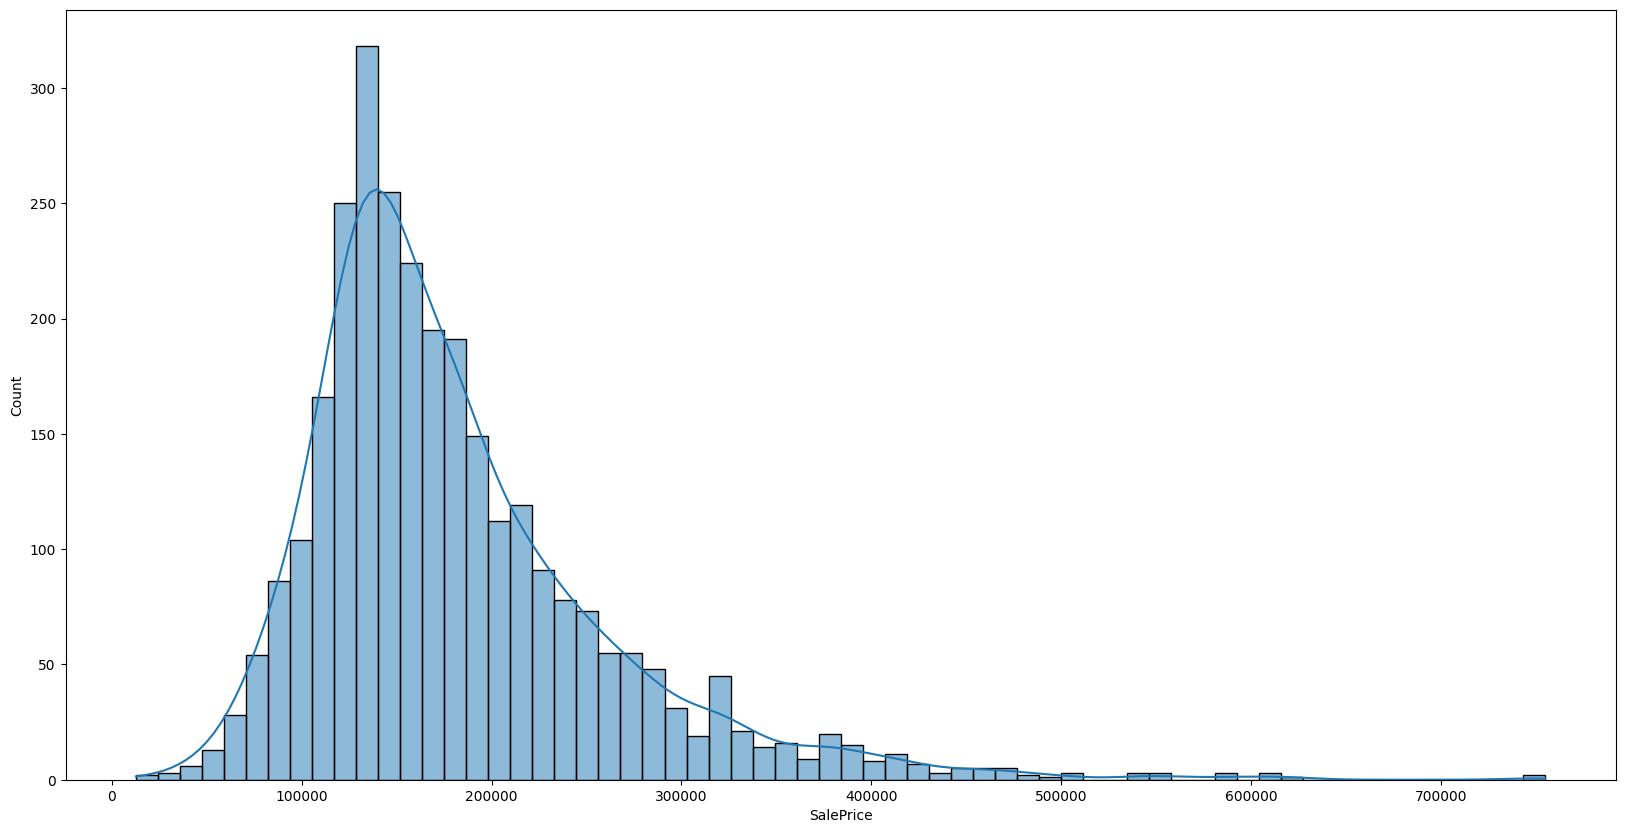

In [10]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='SalePrice', kde=True)

- Dựa vào đồ thị phân phối thì ta thấy được **SalePrice** đang bị lệch phải. Vì vậy ta cần:
    - Xử lý các outliers với mức giá cao
    - Mình có thể normalized lại với log transform

### Numerical Features Analysis

#### Phân tích

* Với dữ liệu số ta có thể tìm hiểu sâu hơn về các features có độ tương quan với **SalePrice** nhất
* Vì vậy ta sẽ xem qua các features có độ tương quan cao

In [11]:
correlation = numerical_features.corr()['SalePrice'].sort_values(ascending=False)[:10]
correlation

SalePrice        1.000000
Overall Qual     0.799262
Gr Liv Area      0.706780
Garage Cars      0.647562
Garage Area      0.640138
Total Bsmt SF    0.632529
1st Flr SF       0.621676
Year Built       0.558426
Full Bath        0.545604
Garage Yr Blt    0.540262
Name: SalePrice, dtype: float64

<Axes: >

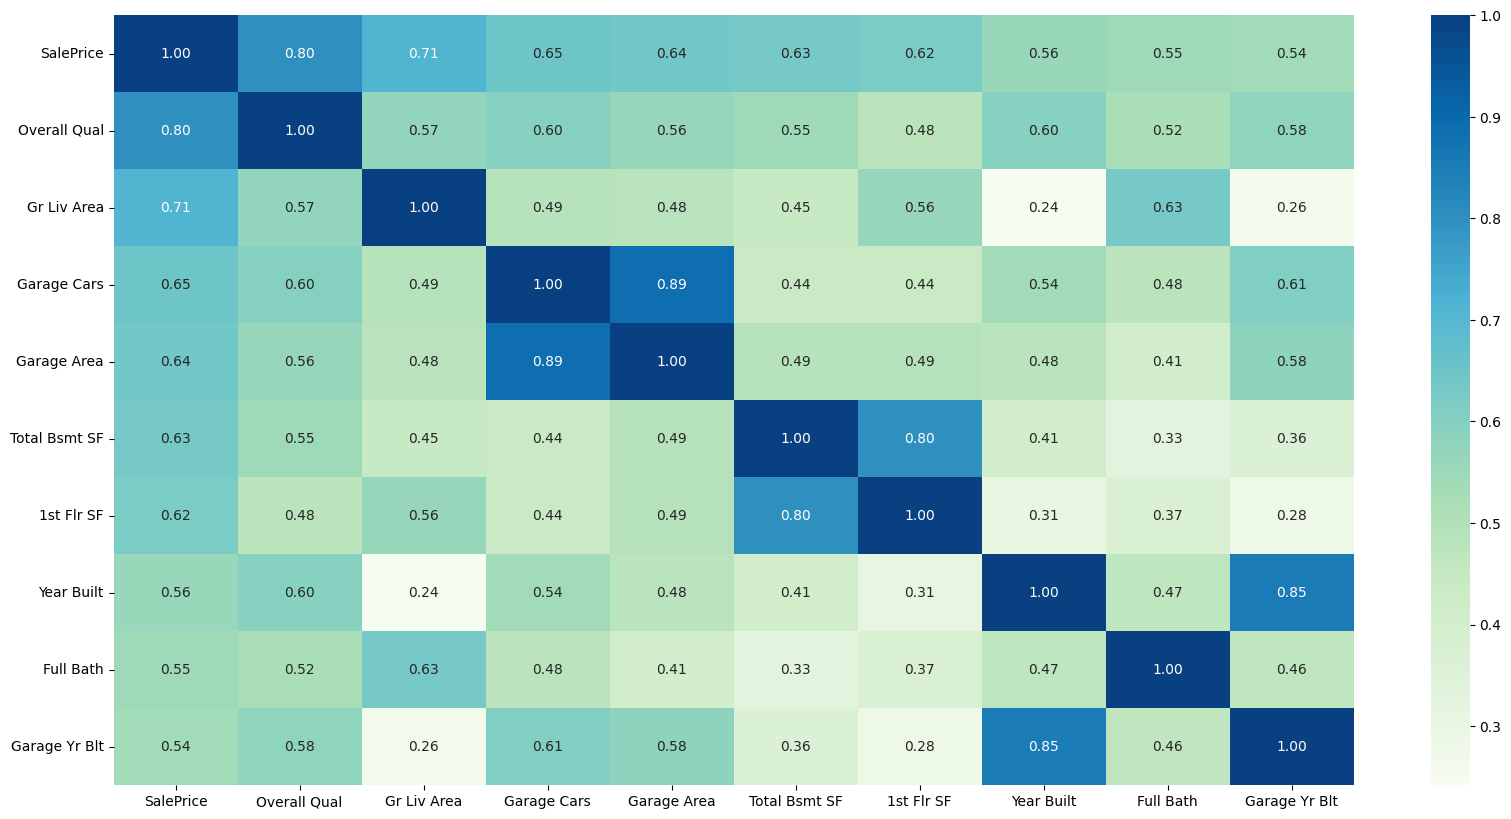

In [12]:
# Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(numerical_features[correlation.index].corr(), annot=True, cmap='GnBu', fmt='.2f')

- Với kết quả như trên ta sẽ xem sâu hơn qua các features tiểu biểu sau:
    * `Overall Qual`: Chất lượng tổng quát
    * `Gr Liv Area`: Diện tích sàn ở
    * `Garage Area` và `Garage Cars`: Với 2 features này khá tương đồng nhau nên ta có thể chọn `Garage Cars` do có độ tương quan với `Sale Price` cao hơn `Garage Area`
    * `1st Flr SF` và `Total Bsmt SF`: Với 2 features có cùng tính chất với `Gr Liv Area` nên ta có thể không cần phân tích sâu
    * `Year Built`: Một feature khá quan trọng ví với căn nhà cũ hay mới sẽ ảnh hưởng rất nhiều đến `SalePrice`

#### Overall Qual

* Với `Overall Qual` ta sẽ sử dụng **Box Plot** vì với đây là **ordinal numerical feature**
* Overall Qual là một trong những feature quan trọng nhất. Nó rất dễ dàng thấy khi nhà có chất lượng càng cao thì sẽ càng có giá cao hơn.

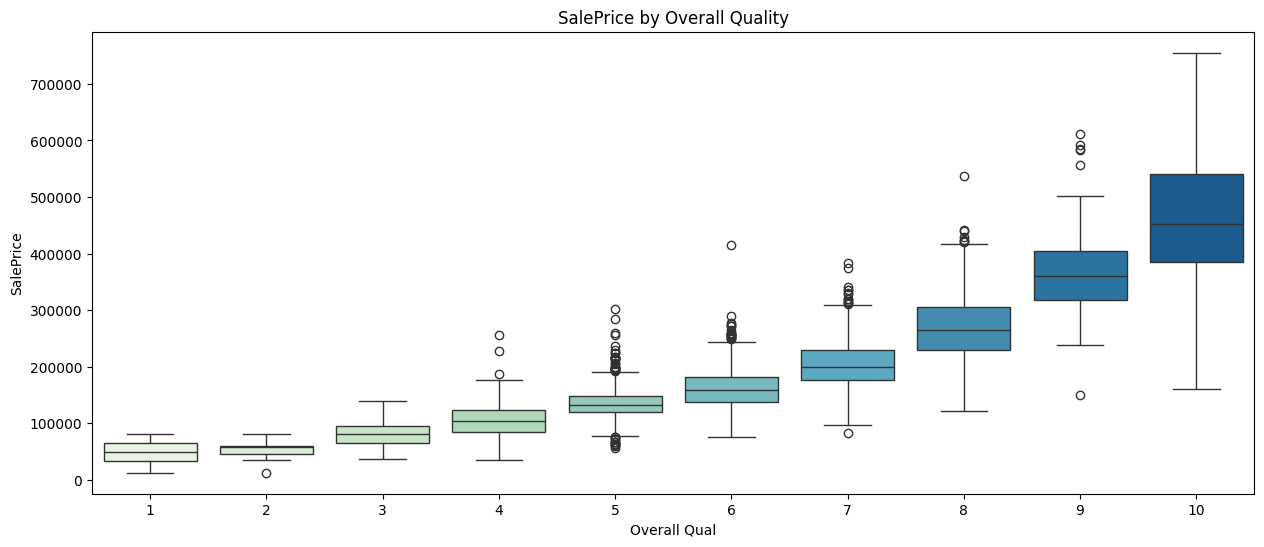

In [13]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Overall Qual', y='SalePrice', data=df, palette='GnBu')
title = plt.title('SalePrice by Overall Quality')

#### Ground Living Area

* Giá nhà và diện tích nhà luôn là 2 tính chất song hành với nhau. Và 2 tính chất này sẽ có mối quan hệ tuyến tính với nhau
* Ta sẽ dễ dàng nhận ra điều này với **Scatter plot**
* Ta có thể tìm hiểu sâu hơn qua biểu đồ phân phối của feature này

<Axes: xlabel='Gr Liv Area', ylabel='Count'>

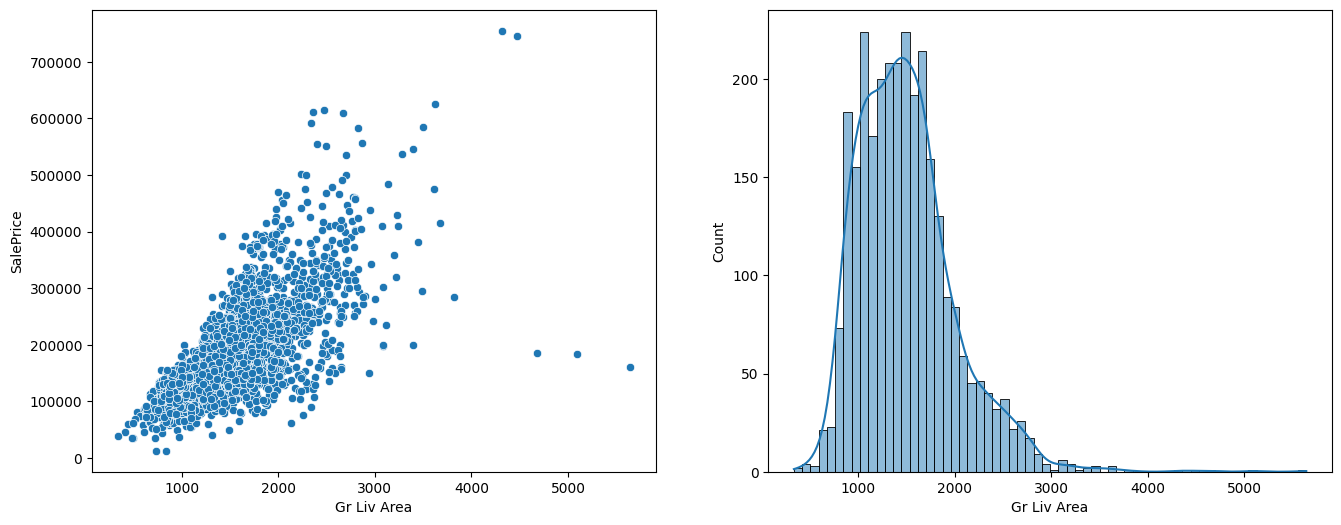

In [14]:
f, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x= "Gr Liv Area", y='SalePrice', data=df, ax=axes[0])
sns.histplot(data=df, x='Gr Liv Area', kde=True, ax = axes[1])

* Ta có thể thấy có một số outliers với **SalePrice** thấp hơn 200k nhưng lại có **Gr Liv Area** > 4000
* Vì các bài toán **Regression** rất nhạy cảm với các outlier nên ta sẽ xử lý các outlier của này sau

#### Garage Cars

- Với số xe cần ở trong một garage lại có điều đặc biệt khi 3 có giá cao hơn so với 4
- Điều này có thể lý giải bằng việc do 4 số trong garage có vẻ không phải một con số phù hợp với các hộ gia đình ở Ames


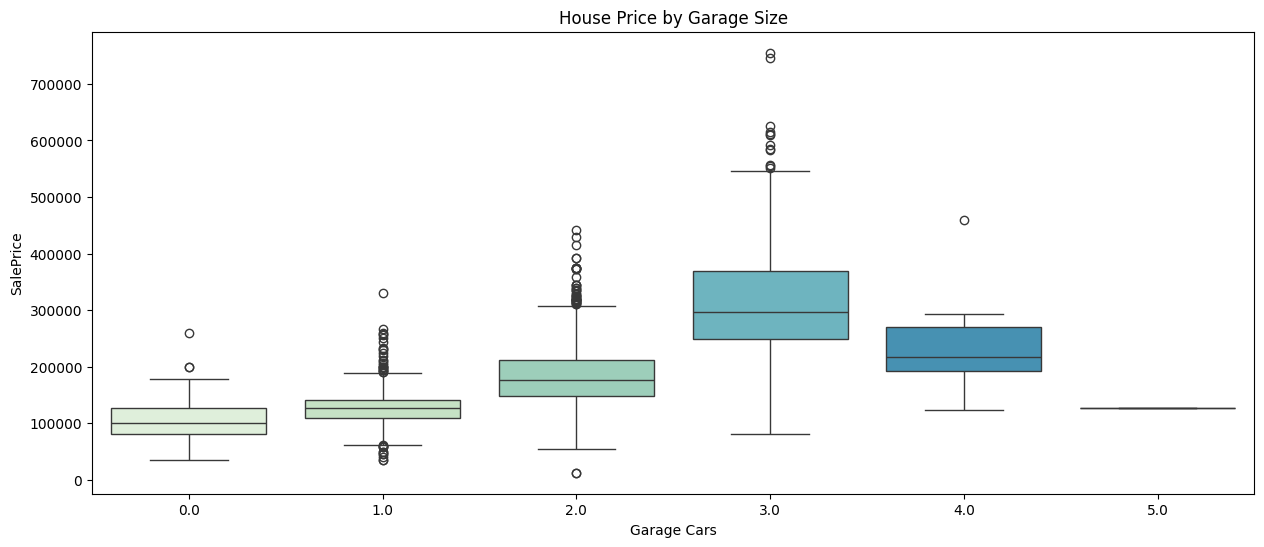

In [15]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Garage Cars', y='SalePrice', data=df, palette='GnBu')
title = plt.title('House Price by Garage Size')

#### Year Built

Các căn nhà được xây dựng từ năm 1872 đến năm 2010


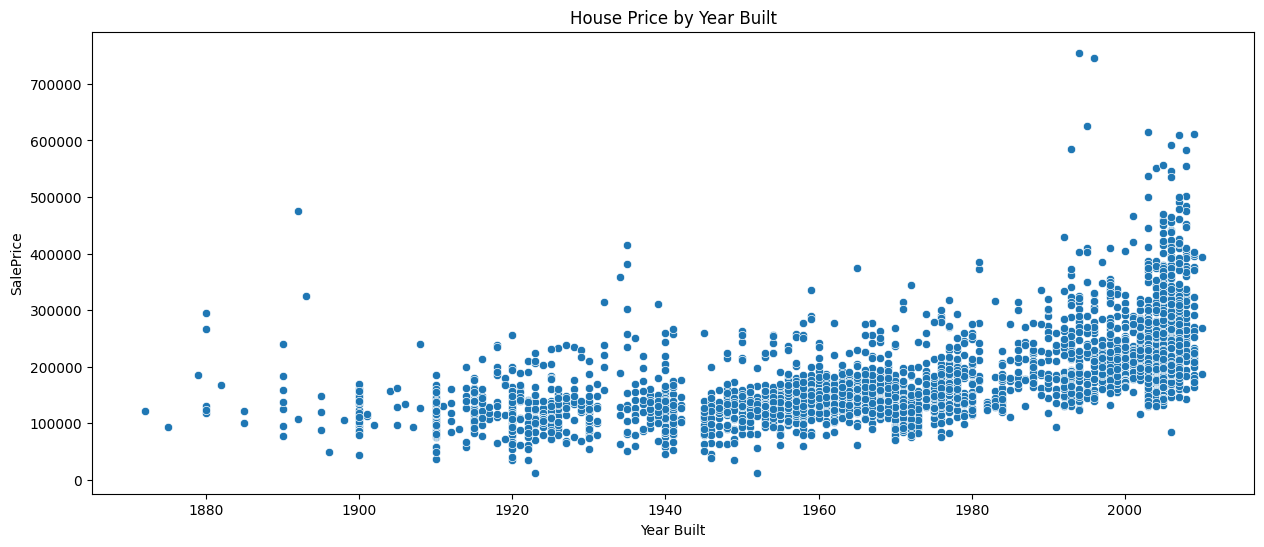

In [16]:
print(f"Các căn nhà được xây dựng từ năm {df['Year Built'].min()} đến năm {df['Year Built'].max()}")
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Year Built', y='SalePrice', data=df)
title = plt.title('House Price by Year Built')

### Categorical Feature Analysis

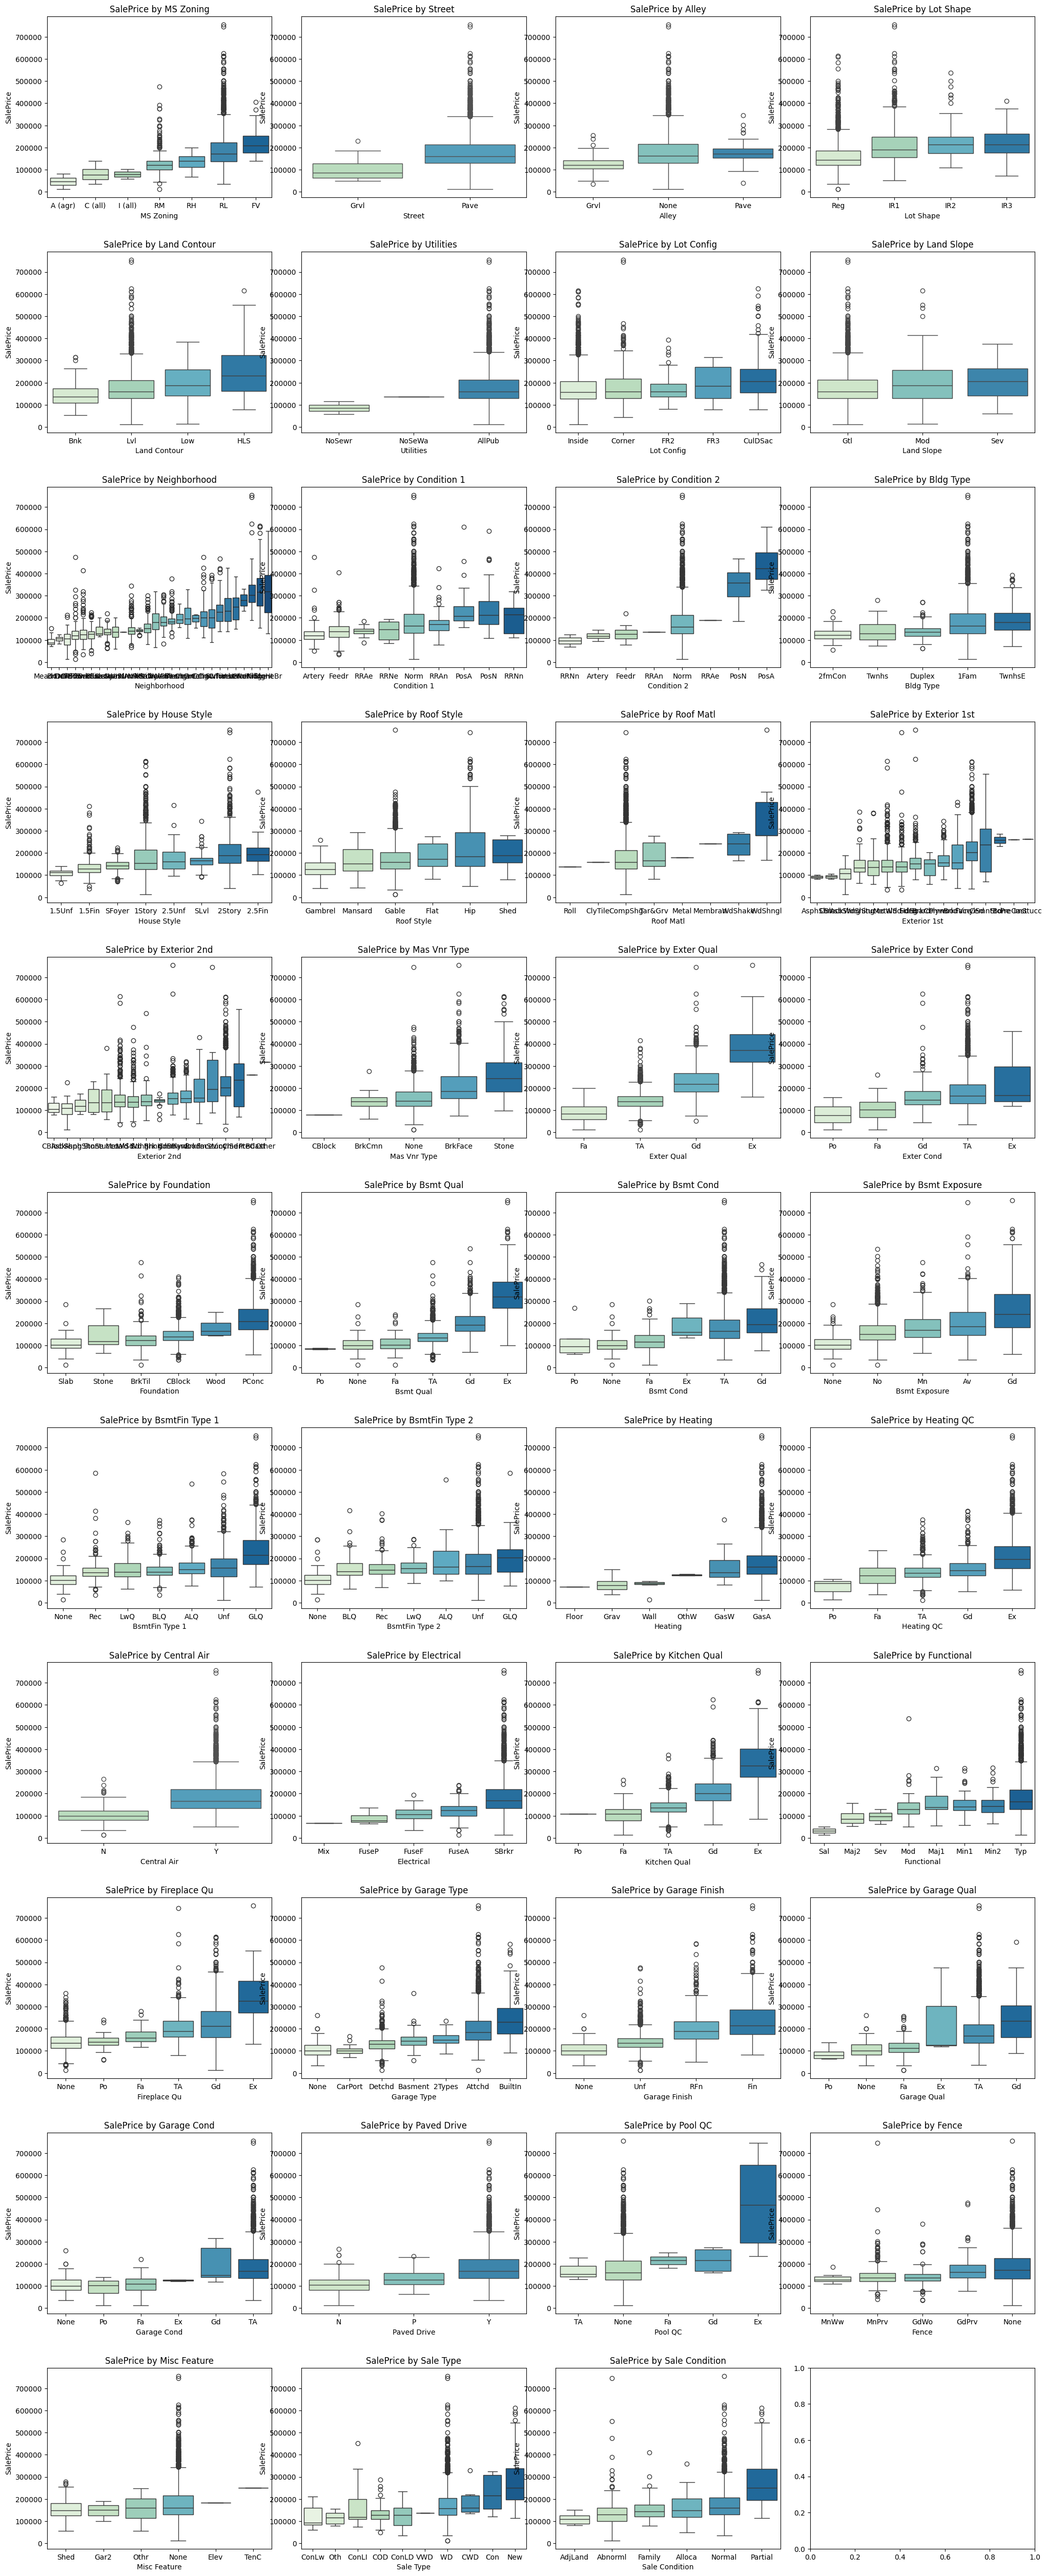

In [17]:
number_of_cat_feats = categorical_features.shape[1]
number_of_cat_feats_per_row = 4
number_of_rows = number_of_cat_feats // number_of_cat_feats_per_row + 1
f, axs = plt.subplots(number_of_rows, number_of_cat_feats_per_row, figsize=(20, 50))
f.tight_layout()
f.subplots_adjust(hspace=0.3)

list_columns = categorical_features.columns.to_list()

# sns.boxplot(x='MS Zoning', y='SalePrice', data=df, palette='GnBu', ax=axs[0, 0])
for i in list_columns:
    order = df.groupby(i)['SalePrice'].median().sort_values().index
    sns.boxplot(
        x=i,
        y='SalePrice',
        data=df,
        order=order,
        palette='GnBu', 
        ax=axs[list_columns.index(i) // number_of_cat_feats_per_row, list_columns.index(i) % number_of_cat_feats_per_row])
    axs[list_columns.index(i) // number_of_cat_feats_per_row, list_columns.index(i) % number_of_cat_feats_per_row].set_title(f"SalePrice by {i}")

## Feature Engineering

* Với các feature `Total Bsmt SF`, `1st Flr SF`, `2nd Flr SF` trên mặt ý nghĩa thực tế nó rất quan trọng 
    nhưng ta có thể ở các phân tích trên nó lại k có tương quan cao 
    nên ta có thể gộp chung lại thành một feature `Total SF` bao gồm tất cả ý nghĩa của các features đó.
* Tương tự như vậy với `Full Bath`, `Bsmt Full Bath`, `Half Bath`, `Bsmt Half Bath` -> `Total Bath`


In [89]:
df['Total SF'] = df['Total Bsmt SF'] + df['Gr Liv Area'] + df['1st Flr SF'] + df['2nd Flr SF']
df['Total Bath'] = df['Full Bath'] + df['Bsmt Full Bath'] + 0.5 * (df['Half Bath'] + df['Bsmt Half Bath'])
df['House Age'] = df['Yr Sold'] - df['Year Built']
df['Is Remodeled'] = np.where(df['Year Remod/Add'] == df['Year Built'], 0, 1)
df['Is New'] = np.where(df['Yr Sold'] == df['Year Built'], 1, 0)

In [90]:
# df.drop(['Total Bsmt SF', 'Gr Liv Area', '1st Flr SF', '2nd Flr SF'], axis=1, inplace=True)
# df.drop(['Full Bath', 'Bsmt Full Bath', 'Half Bath', 'Bsmt Half Bath'], axis=1, inplace=True)
df.drop(['Year Built', 'Year Remod/Add'], axis=1, inplace=True)

In [91]:
# Update numerical features and categorical features
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
# Reorder target features
df = df[X.columns.to_list() + ['SalePrice']]
numerical_features = df.select_dtypes(exclude=['object'])
categorical_features = df.select_dtypes(include=['object'])

## Features Selection


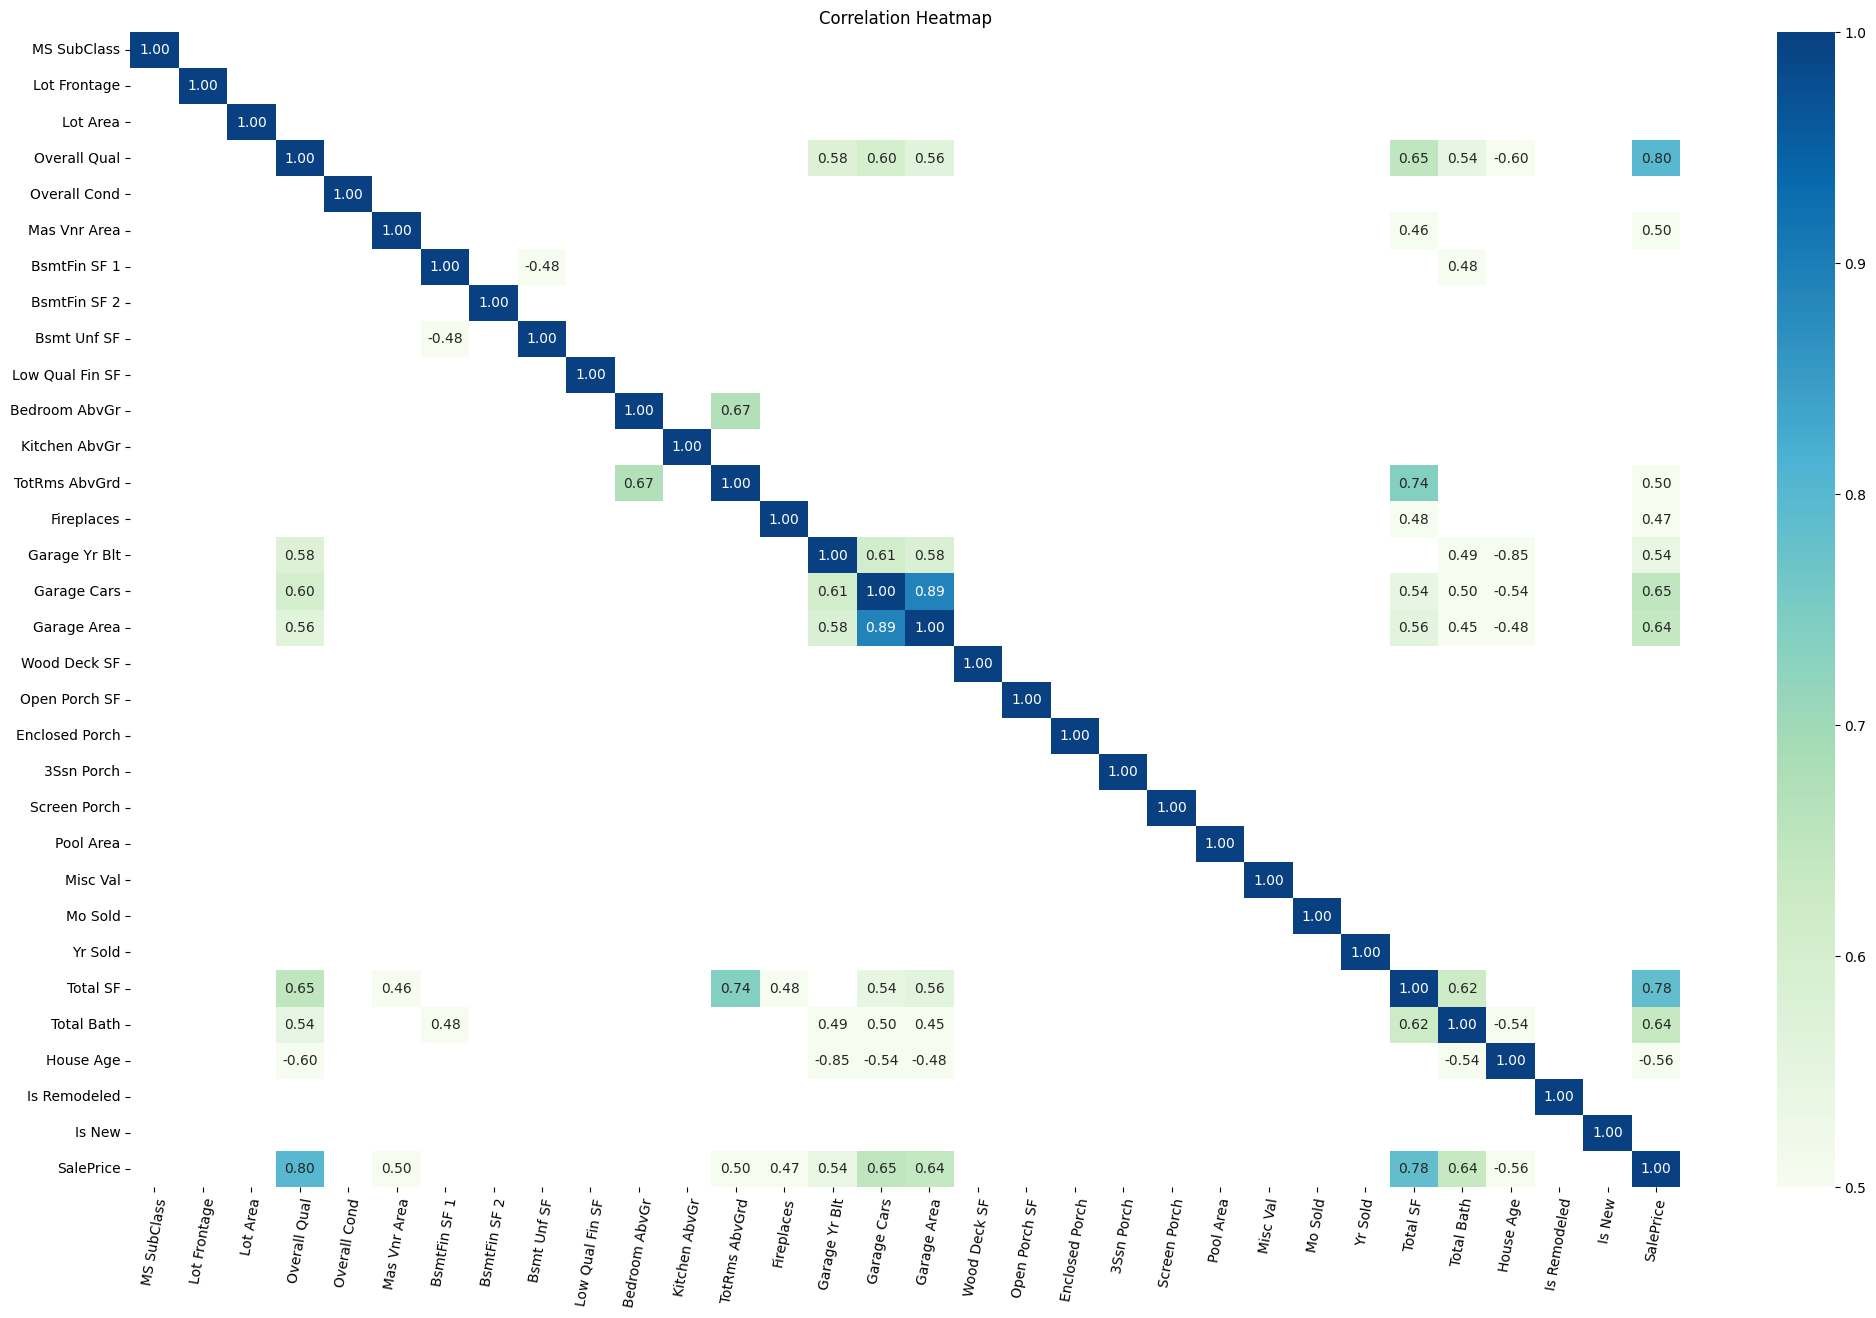

In [21]:
corr_mat = numerical_features.corr()

# Select correlations greater than 0.45
high_corr_mat = corr_mat[abs(corr_mat) >= 0.45]

# Plot correlation heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.2f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
plt.xticks(rotation=80)
title = plt.title('Correlation Heatmap')

- Dựa vào các correlations trên ta có thể thấy được các cặp có độ tương quan cao là:
    * `Garage Area` - `Garage Cars` ~ 0.89

- Vậy ta sẽ drop các feature có độ tương quan thấp hơn với `SalePrice`
    * `Garage Area` ~ 0.64 - `Garage Cars` ~ 0.65 => Ta sẽ drop `Garage Area`


In [48]:
df.drop(['Garage Area'], axis=1, inplace=True)
# Update numerical features and categorical features
numerical_features = df.select_dtypes(exclude=['object'])
categorical_features = df.select_dtypes(include=['object'])
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

- Ta có thể sử dụng RFE để lựa chọn các feature mà mình cần


In [23]:
# Để cho chắc chắn hơn ta có thể sử dụng RFE với LogisticRegression để tìm ra những feature quan trọng nhất
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=10, step=1)
rfe.fit(numerical_features.drop('SalePrice', axis=1), numerical_features['SalePrice'])


RFE(estimator=LinearRegression(), n_features_to_select=10)

In [24]:
numerical_features.drop('SalePrice', axis=1).columns[rfe.support_]

Index(['Overall Qual', 'Overall Cond', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Total Bath',
       'Is Remodeled', 'Is New'],
      dtype='object')

## Outliers

- Vì ta có thể thấy `Overall Qual` và `Gr Liv Area` là 2 features có độ tương quan với `Sale Price` nhất
- Ta sẽ tìm hiểu sâu hơn về 2 features này qua box và scatter plot để loại bỏ các outliers

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

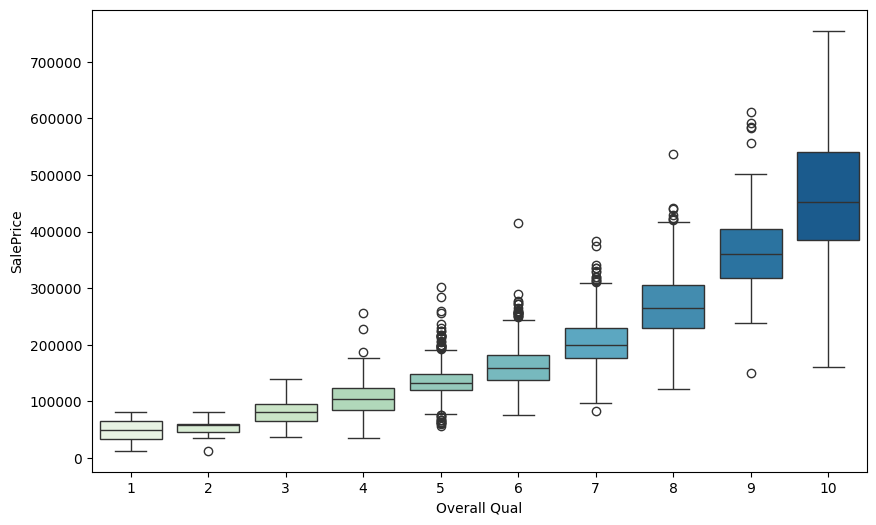

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Overall Qual', y='SalePrice', data=df, palette='GnBu')

Text(0.5, 1.0, 'Giá nhà theo diện tích sàn')

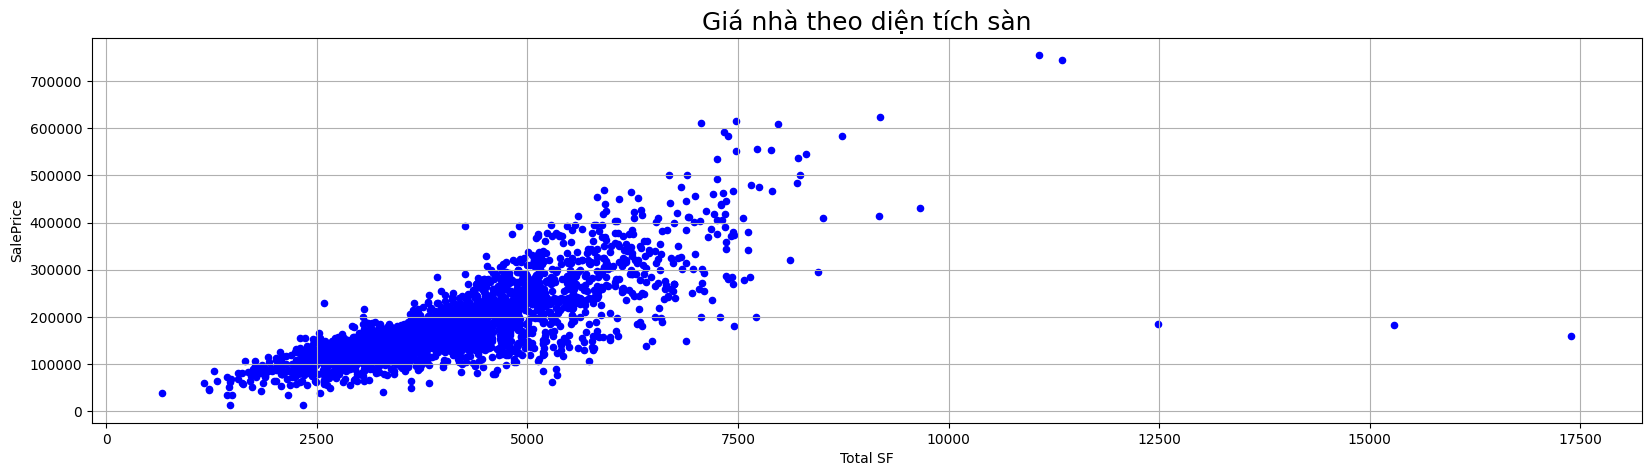

In [26]:
df.plot(kind='scatter', x='Total SF', y='SalePrice', figsize=(20,5), color='blue', grid=True)
plt.title('Giá nhà theo diện tích sàn', fontsize=18)

- Với hình trên ta có thể thấy được có một số outliers với diện tích trên 12000 nhưng giá nhà chỉ ở mức dưới 200k
    -> Ta sẽ filter các giá trị đó như sau

In [92]:
ouline_index = df[(df["Total SF"] > 12000) & (df["SalePrice"] < 200000)]
df.drop(ouline_index.index, inplace=True)

- Check lại các outlier

Text(0.5, 1.0, 'House Price by Total SF')

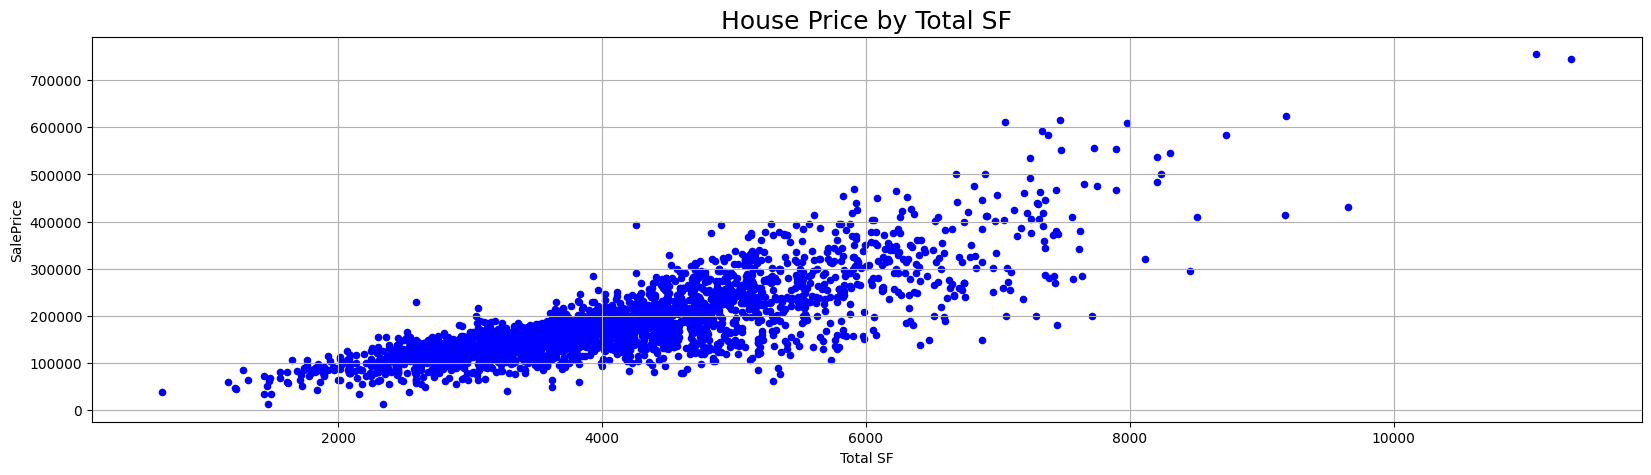

In [93]:
df.plot(kind='scatter', x='Total SF', y='SalePrice', figsize=(20,5), color='blue', grid=True)
plt.title('House Price by Total SF', fontsize=18)

In [94]:
numerical_features = df.select_dtypes(exclude=['object'])
categorical_features = df.select_dtypes(include=['object'])
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [95]:
X.shape

(2927, 82)

# Data Preprocessing

## Label Encoding

In [31]:
X.select_dtypes(include=['object']).columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [96]:
from sklearn.preprocessing import LabelEncoder
# Ordinal categorical columns
label_encoding_cols = [
    "Alley", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2",
    "Bsmt Qual", "Exter Cond", "Exter Qual", "Fireplace Qu", "Functional",
    "Garage Cond", "Garage Qual", "Heating QC", "Kitchen Qual", "Land Slope",
    "Lot Shape", "Paved Drive", "Pool QC", "Street", "Utilities"
]

# Apply Label Encoder
label_encoder = LabelEncoder()

for col in label_encoding_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [33]:
X.select_dtypes(include=['object']).columns

Index(['MS Zoning', 'Land Contour', 'Lot Config', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Foundation', 'Heating', 'Central Air', 'Electrical', 'Garage Type',
       'Garage Finish', 'Fence', 'Misc Feature', 'Sale Type',
       'Sale Condition'],
      dtype='object')

In [34]:
X.select_dtypes(exclude=['object']).columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Street', 'Alley',
       'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Heating QC', 'Low Qual Fin SF',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt',
       'Garage Cars', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Pool QC', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'Total SF', 'Total Bath', 'House Age', 'Is Remodeled',
       'Is New'],
      dtype='object')

* Và một đặc điểm thú vị với giá nhà đó là thời điểm bán nhà là một feat rất quan trọng
    - Ví dụ như thời điểm đó gặp khó khăn về kinh tế sẽ có giá thấp hơn so với thông thường
* Tại vì ta có một số numerical là số nhưng lại không mang ý nghĩa là số như:
    - `Mo Sold`, `Yr Sold`, `MS SubClass`
* Vì vậy ta sẽ chuyển 2 feature này thành categorical features

In [97]:
for col in ['Yr Sold','Mo Sold', 'MS SubClass']:
    X[col] = X[col].apply(str)

## Feature Scaling

* Bởi vì các model liên quan đến regression rất nhạy cảm với outliers nên ta có thể sử dụng RobustScaler.

In [36]:
from sklearn.preprocessing import RobustScaler
numerical_cols = list(X.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

## One-hot Encoding

In [98]:
X = pd.get_dummies(X, drop_first=True)
print("X.shape:", X.shape)

X.shape: (2927, 244)


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [100]:
y_train = np.log1p(y_train)
y_train


265     12.375820
376     12.425212
2108    12.287657
1463    12.323416
271     12.269052
          ...    
1639    12.675767
1095    12.078245
1130    12.242891
1294    11.713832
860     11.804856
Name: SalePrice, Length: 1463, dtype: float64

In [101]:
from scipy import stats

numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
# 
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 40 skewed numerical features to Box Cox transform


In [102]:
skewness = skewness[abs(skewness) > 0.75]

In [103]:
for i in skewness.index:
    print(skewness.loc[i].values[0])

22.221197596338452
17.719246570103284
13.178732275404027
12.10563511257324
11.391989747269015
4.766126805402837
4.309064710091322
4.136226380012968
4.010074013117747
3.9530572855928505
3.952497706306753
2.5988622511253
2.4939738687669135
1.8438543237553984
1.7416080859993492
1.3561861214365345
1.2229175945831143
0.9760929017872725
0.9507137060778705
0.9240876015781428
0.8653811207375178
0.8303743292821472
0.8171727533322343
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [104]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    if (skewness.loc[feat].values[0] > 0.75) and (feat not in ['SalePrice', 'MS SubClass']):
        X_train[feat] = boxcox1p(X_train[feat], lam)
        X_test[feat] = boxcox1p(X_test[feat], lam)

In [105]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

model = Lasso(alpha=0.001, max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = np.exp(y_pred) - 1
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 21321.52570044929


# Modeling

## Ensemble

## Feed Forward Neural Network

### Transform data to fit with model from keras

In [40]:
import numpy as np

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

### Implement RNNs

#### Basic FFNN 

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_ffnn_basic = Sequential([
    Dense(64, activation='relu', input_shape=(
        X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model_ffnn_basic.compile(
    optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history_ffnn_basic = model_ffnn_basic.fit(X_train, y_train, epochs=100,
                                          batch_size=32, validation_split=0.2)

print(history_ffnn_basic.history.keys())

loss_ffnn_basic = model_ffnn_basic.evaluate(X_test, y_test)
loss_ffnn_basic_lst = history_ffnn_basic.history['loss']
loss_ffnn_basic_accuracy = history_ffnn_basic.history['accuracy']

print("RMSE:", np.sqrt(loss_ffnn_basic))

2023-12-20 22:12:38.503650: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 

#### Deep FFNN

In [ ]:
model_ffnn_deep = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model_ffnn_deep.compile(
    optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history_ffnn_deep = model_ffnn_deep.fit(X_train, y_train, epochs=100,
                                          batch_size=32, validation_split=0.2)

loss_ffnn_deep = model_ffnn_deep.evaluate(X_test, y_test)
loss_ffnn_deep_lst = history_ffnn_deep.history['loss']
loss_ffnn_deep_accuracy = history_ffnn_deep.history['accuracy']

print("RMSE:", np.sqrt(loss_ffnn_deep))

Epoch 1/100
37/37 [==============================] - 1s 5ms/step - loss: 37656174592.0000 - accuracy: 0.0000e+00 - val_loss: 40457445376.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 36891246592.0000 - accuracy: 0.0000e+00 - val_loss: 38323728384.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 33444534272.0000 - accuracy: 0.0000e+00 - val_loss: 33223206912.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 29927020544.0000 - accuracy: 0.0000e+00 - val_loss: 28232798208.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 25998616576.0000 - accuracy: 0.0000e+00 - val_loss: 25520173056.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 22614605824.0000 - accuracy: 0.0000e+00 - val_loss: 22613639168.0000 - val_accurac

#### Wide FFNN

In [ ]:
model_ffnn_wide = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(1, activation='linear')
])
model_ffnn_wide.compile(
    optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history_ffnn_wide = model_ffnn_wide.fit(X_train, y_train, epochs=100,
                                          batch_size=32, validation_split=0.2)

loss_ffnn_wide = model_ffnn_wide.evaluate(X_test, y_test)
loss_ffnn_wide_lst = history_ffnn_wide.history['loss']
loss_ffnn_wide_accuracy = history_ffnn_wide.history['accuracy']

print("RMSE:", np.sqrt(loss_ffnn_wide))

Epoch 1/100
37/37 [==============================] - 1s 5ms/step - loss: 37588881408.0000 - accuracy: 0.0000e+00 - val_loss: 40314834944.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 36944736256.0000 - accuracy: 0.0000e+00 - val_loss: 39127175168.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 35041140736.0000 - accuracy: 0.0000e+00 - val_loss: 36406358016.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 32118958080.0000 - accuracy: 0.0000e+00 - val_loss: 32949364736.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 29506940928.0000 - accuracy: 0.0000e+00 - val_loss: 29672189952.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 26991855616.0000 - accuracy: 0.0000e+00 - val_loss: 27711129600.0000 - val_accurac

#### Regularized FFNN

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model_ffnn_reg = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(
        0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='linear')
])
model_ffnn_reg.compile(
    optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history_ffnn_reg = model_ffnn_reg.fit(X_train, y_train, epochs=100,
                                          batch_size=32, validation_split=0.2)

loss_ffnn_reg = model_ffnn_reg.evaluate(X_test, y_test)
loss_ffnn_reg_lst = history_ffnn_reg.history['loss']
loss_ffnn_reg_accuracy = history_ffnn_reg.history['accuracy']

print("RMSE:", np.sqrt(loss_ffnn_reg))

Epoch 1/100


37/37 [==============================] - 1s 5ms/step - loss: 37678653440.0000 - accuracy: 0.0000e+00 - val_loss: 40535388160.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 37644066816.0000 - accuracy: 0.0000e+00 - val_loss: 40486006784.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 37550436352.0000 - accuracy: 0.0000e+00 - val_loss: 40357629952.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 37336834048.0000 - accuracy: 0.0000e+00 - val_loss: 40071278592.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 36897230848.0000 - accuracy: 0.0000e+00 - val_loss: 39540248576.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 36168466432.0000 - accuracy: 0.0000e+00 - val_loss: 38690664448.0000 - val_accuracy: 0.0000e+0

#### Comparison

##### Model Loss Comparison

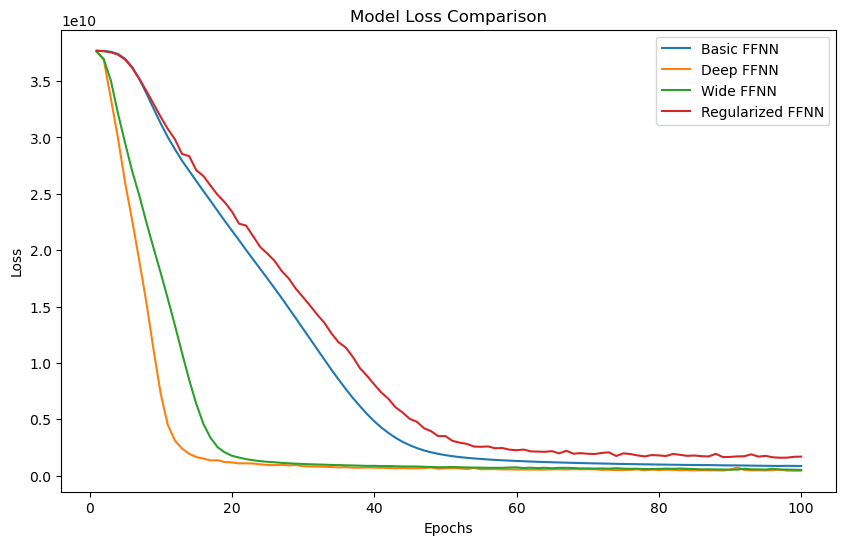

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 101) 

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_ffnn_basic_lst, label='Basic FFNN')
plt.plot(epochs, loss_ffnn_deep_lst, label='Deep FFNN')
plt.plot(epochs, loss_ffnn_wide_lst, label='Wide FFNN')
plt.plot(epochs, loss_ffnn_reg_lst, label='Regularized FFNN')

plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


##### Accuracy Plot Comparison

In [ ]:
print("Basic FFNN Accuracy:", loss_ffnn_basic_accuracy)
print("Deep FFNN Accuracy:", loss_ffnn_deep_accuracy)
print("Wide FFNN Accuracy:", loss_ffnn_wide_accuracy)
print("Regularized FFNN Accuracy:", loss_ffnn_reg_accuracy)

Basic FFNN Accuracy: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Deep FFNN Accuracy: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

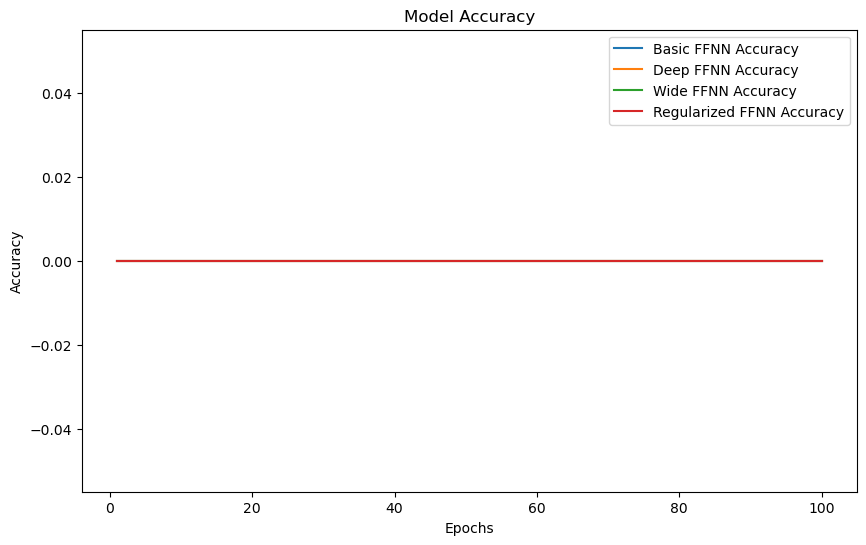

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(
    epochs, loss_ffnn_basic_accuracy, label='Basic FFNN Accuracy')
plt.plot(
    epochs, loss_ffnn_deep_accuracy, label='Deep FFNN Accuracy')
plt.plot(
    epochs, loss_ffnn_wide_accuracy, label='Wide FFNN Accuracy')
plt.plot(
    epochs, loss_ffnn_reg_accuracy, label='Regularized FFNN Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Recurrent Neural Network